In [1]:
import os
import sys
# Root folder
sys.path.append("../..")

import numpy as np
from PIL import Image


from utils.image_utils import annotate_positions_in_image

/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = Image.open("../assets/images/table_with_notebook.jpg").resize((480,360))

In [21]:
x_interval, y_interval = 3, 3
x_margin, y_margin = 0.15, 0.15
x = np.linspace(0 + x_margin, 1 - x_margin, x_interval)
y = np.linspace(0 + y_margin, 1 - y_margin, y_interval)

# Create the meshgrid
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
positions = np.vstack([X, Y]).T

mask = np.ones((image.width, image.height))
output = annotate_positions_in_image(image, positions)

In [22]:
positions

array([[0.15, 0.15],
       [0.5 , 0.15],
       [0.85, 0.15],
       [0.15, 0.5 ],
       [0.5 , 0.5 ],
       [0.85, 0.5 ],
       [0.15, 0.85],
       [0.5 , 0.85],
       [0.85, 0.85]])

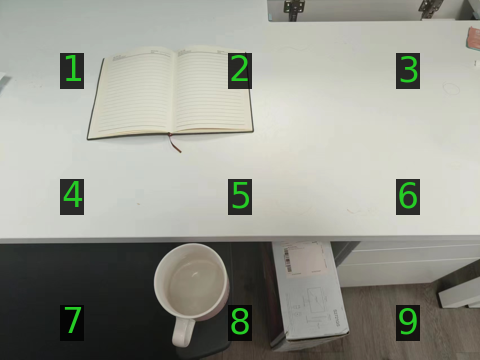

In [23]:
output

In [6]:
from apis.language_model import LLaVA, GEMINI_PRO_VISION, GPT4V

gemini_pro_vision = GEMINI_PRO_VISION()

gpt4v = GPT4V()


In [7]:
prompt = "I want to put a object on the book without collision. Tell me the number dirctly."
response = gpt4v.chat(prompt, output)

print("\nResponse:\n", response, '\n', '_'*50)


Response:
 To place an object on the book without collision, you should choose number 7. 
 __________________________________________________


In [8]:
from apis.language_model import LLaVA

llava = LLaVA()

prompt = "Which area is empty?"
response = llava.chat(prompt, output)

print("\nLLaVA responded:\n", response, '\n', '_'*50)


ConnectionError: HTTPConnectionPool(host='sc2grpwk3.d2.comp.nus.edu.sg', port=55575): Max retries exceeded with url: /llava_chat (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fbccc3108b0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
from apis.language_model import LLaVA

llava = LLaVA()

prompt = "What is under the number 3?"
response = llava.chat(prompt, output)

print("\nLLaVA responded:\n", response, '\n', '_'*50)



LLaVA responded:
 USER:  

What is under the number 3?
ASSISTANT: Under number 3, there is a book. 
 __________________________________________________
